## Gather

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import json

import re
import sqlite3

In [304]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [305]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file_handle:
    file_handle.write(response.content)
    
img_pred_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [306]:
tweets = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))

tweet_json_df = pd.DataFrame(tweets)

In [307]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [308]:
len(str(892420643555336193))

18

In [309]:
for i in tweet_json_df.id:
    assert len(str(i)) == 18

## Assess

### Visually

In [310]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [311]:
img_pred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [312]:
tweet_json_df

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,None,...,False,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,False,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,None,...,False,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,None,...,False,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,None,...,False,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835'

### Programmatically

In [313]:
# Invistgating the datasets.

In [314]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [315]:
img_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [316]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [317]:
# Checking values of in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id.

twitter_archive_df[(twitter_archive_df.in_reply_to_status_id).notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [318]:
twitter_archive_df[(twitter_archive_df.retweeted_status_id).notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [319]:
# Checking the retweets (tweets that don't contain dog ratings)

twitter_archive_df[(twitter_archive_df.retweeted_status_id).notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [320]:
# Checking that retweeted_status_id non null entries are retweets that don't include dog ratings.

tweet_id = 775096608509886464
twitter_archive_df[twitter_archive_df.tweet_id == tweet_id].text

784    RT @dog_rates: After so many requests, this is...
Name: text, dtype: object

In [321]:
# Cheking the names for any missing ones.

twitter_archive_df.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Tucker         10
Penny          10
Lola           10
Winston         9
Bo              9
Sadie           8
the             8
Buddy           7
Bailey          7
Toby            7
an              7
Daisy           7
Dave            6
Oscar           6
Jack            6
Jax             6
Koda            6
Scout           6
Milo            6
Leo             6
Bella           6
Stanley         6
Rusty           6
Phil            5
             ... 
Staniel         1
Flash           1
Dook            1
Christoper      1
Emanuel         1
Alejandro       1
Darrel          1
Combo           1
Brownie         1
Arlo            1
Pluto           1
Tonks           1
Grizzie         1
Jazz            1
Sundance        1
Samsom          1
Lassie          1
Jomathan        1
Ulysses         1
Snoop           1
Billy           1
Rizzo           1
Amy             1
Tanner          1
Eazy      

In [322]:
twitter_archive_df[twitter_archive_df.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [323]:
(twitter_archive_df[twitter_archive_df.name == 'a']).shape

(55, 17)

In [324]:
twitter_archive_df[twitter_archive_df.name == 'a'].text[1002]

'This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW'

In [325]:
twitter_archive_df_name_a_an = pd.concat((twitter_archive_df[twitter_archive_df.name == 'a'], twitter_archive_df[twitter_archive_df.name == 'an']), axis=0)
twitter_archive_df_name_a_an

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [326]:
count = 0
for idx in twitter_archive_df_name_a_an.index:
    txt = twitter_archive_df_name_a_an.text[idx]
    if 'name' in txt:
        count += 1
        print(txt)
        print()
print("Number of missing names: ", count)
print("Number of None names: ", len(twitter_archive_df_name_a_an) - count)

This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI

This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3

This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7

This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr

This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo

This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj

This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN

This is a spotted

In [327]:
# Investgating

twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [328]:
# Checking duplicated values

twitter_archive_df.rating_numerator.sort_values().value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [329]:
twitter_archive_df.rating_denominator.sort_values().value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [330]:
# Checking decimal numerator rating.

def check_decimal_rating(df):
    
    decimal_numerator_pattern = '(\d+\.\d+)\/(\d+)'
    matches = re.search(decimal_numerator_pattern, df['text'])
    
    if matches != None:
        print("Numerator Rating: {} \t Denominator Rating: {}".format(matches.group(1), matches.group(2)))

twitter_archive_df.apply(check_decimal_rating, axis=1); 

Numerator Rating: 13.5 	 Denominator Rating: 10
Numerator Rating: 9.75 	 Denominator Rating: 10
Numerator Rating: 9.75 	 Denominator Rating: 10
Numerator Rating: 11.27 	 Denominator Rating: 10
Numerator Rating: 9.5 	 Denominator Rating: 10
Numerator Rating: 11.26 	 Denominator Rating: 10


In [331]:
# Checking rating_denominator less than 10

twitter_archive_df_without_retweets = twitter_archive_df[(twitter_archive_df.retweeted_status_id).isnull()]

twitter_archive_df_without_retweets[twitter_archive_df_without_retweets.rating_denominator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [332]:
rating_denominator_less_10 = twitter_archive_df_without_retweets[twitter_archive_df_without_retweets.rating_denominator < 10]

for idx in rating_denominator_less_10.index:
    print(rating_denominator_less_10.text[idx])
    print()

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv



In [333]:
# Invistgating img_pred_df

img_pred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [334]:
img_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [335]:
# Checking duplicated urls

img_pred_df[img_pred_df.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [336]:
# Checking first record, index=1297.

img_pred_df[img_pred_df.jpg_url == img_pred_df[img_pred_df.jpg_url.duplicated()].jpg_url[1297]]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True


In [337]:
# Checking inconsistent breed name due to capitalization.

img_pred_df.p1.value_counts().count() == img_pred_df.p1.str.lower().value_counts().count()

True

In [338]:
img_pred_df.p2.value_counts().count() == img_pred_df.p2.str.lower().value_counts().count()

# We discoveried duplicates!

False

In [339]:
print("Count of original name of the algorithm's prediciton: ", img_pred_df.p2.value_counts().count())
print("Count of lowercased name of the algorithm's prediciton: ", img_pred_df.p2.str.lower().value_counts().count())

Count of original name of the algorithm's prediciton:  405
Count of lowercased name of the algorithm's prediciton:  404


In [340]:
img_pred_df.p3.value_counts().count() == img_pred_df.p3.str.lower().value_counts().count()

True

In [341]:
# Checking the tweet_id of the duplicated record of img_pred_df in twitter_archive_df.

twitter_archive_df[twitter_archive_df.tweet_id == 675354435921575936]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1865,675354435921575936,NaN,NaN,2015-12-11 16:40:19 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Everyone needs to watch this. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675354435...,13,10,None,None,None,None,None


In [342]:
# Invistgating tweet_json_df

tweet_json_df

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,None,...,False,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,False,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,None,...,False,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,None,...,False,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,None,...,False,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835'

In [343]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [344]:
# Invistgating

tweet_json_df.user[0]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™ (author)',
 'screen_name': 'dog_rates',
 'location': 'DM YOUR DOGS, WE WILL RATE',
 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 3200889,
 'friends_count': 104,
 'listed_count': 2784,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 114031,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 5288,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'prof

In [345]:
# Invistgating the followers count, might be a useful insight in visualizations!

def extract_followers_count(json_obj):
    print(json_obj['followers_count'])

tweet_json_df.user[0:100].apply(extract_followers_count);

3200889
3200889
3200889
3200889
3200889
3200889
3200889
3200889
3200889
3200889
3200889
3200889
3200889
3200889
3200889
3200889
3200889
3200889
3200889
3200889
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200890
3200891
3200891
3200892
3200892
3200892
3200892
3200892
3200892
3200892
3200892
3200892
3200892
3200892
3200892
3200892
3200892
3200892
3200892
3200891
3200891
3200891
3200891
3200891
3200891
3200891
3200891
3200891
3200891
3200891
3200891
3200891
3200891
3200891
3200891
3200891


#### Quality
##### `twitter_archive_df` table
- timestamp and retweeted_status_timestamp are string not datetime.
- some names are missed, such as 'a' and 'an'.
- some rows does not contain dog ratings but retweets instead.
- some columns are for retweets, such as retweeted_status_timestamp, retweeted_status_id, retweeted_status_user_id. 
- some rating_numerator are decimal!

##### `img_pred_df` table
- duplicated tweets by using the same jpg_url.
- p2 contains inconsistency in algorithm's predictions names.

##### `tweet_json_df` table
- Non-related columns that contain only NaN values like contributors, coordinates, geo.
- Non-related columns contain less than 30 values compared to 2354 entries in other columns.
- created_at is string not datetime.
- id, retweet_count, and favorite_count is from the most useful columns.
- followers_count in user series would be good for visualization.

#### Tidiness
- All tables should be combined into one single table, since they are all describing the tweets themselves.


##### `twitter_archive_df` table
- doggo, floofer, pupper, puppo is a single column.

## Clean

In [427]:
cleaned_archive_df = twitter_archive_df.copy()
cleaned_pred_df = img_pred_df.copy()
cleaned_json_df = tweet_json_df.copy()

#### `twitter_archive_df`: timestamp and retweeted_status_timestamp are string not datetime.

##### Define
- Convert timestamp & retweeted_status_timestamp columns data type from a string to a datetime.

##### Code

In [428]:
cleaned_archive_df['timestamp'] = pd.to_datetime(cleaned_archive_df['timestamp'])

cleaned_archive_df['retweeted_status_timestamp'] = pd.to_datetime(cleaned_archive_df['retweeted_status_timestamp'])

##### Test

In [429]:
cleaned_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

#### `twitter_archive_df`: Dog names are not correct, such as 'a' and 'an'.

##### Define
- Check the text in which is a or an, and reassign the right name. Otherwise, assign None.

##### Code

In [430]:
def name_assign(df):
    if df['name'] == 'a' or df['name'] == 'an':
        words = df['name'].split()
        for idx, word in enumerate(words):
            if 'named' in word:
                df['name'] = words[idx + 1]
            elif 'name' in word:
                df['name'] = words[idx + 2]
            else:
                df['name'] = "None"
    return df

cleaned_archive_df = cleaned_archive_df.apply(name_assign, axis=1)

##### Test

In [431]:
cleaned_archive_df[cleaned_archive_df.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [432]:
cleaned_archive_df[cleaned_archive_df.name == 'an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [433]:
cleaned_archive_df.name.value_counts()

None          807
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
Sadie           8
the             8
Buddy           7
Daisy           7
Bailey          7
Toby            7
Bella           6
Koda            6
Scout           6
Stanley         6
Milo            6
Rusty           6
Leo             6
Oscar           6
Jax             6
Jack            6
Dave            6
very            5
Sunny           5
Larry           5
             ... 
Bobb            1
by              1
Staniel         1
Flash           1
Dook            1
Christoper      1
Laika           1
Darrel          1
Snoop           1
Bluebert        1
Arlo            1
Pluto           1
Tonks           1
Grizzie         1
Jazz            1
Sundance        1
Samsom          1
Lassie          1
Jomathan        1
Brownie         1
Ulysses         1
Billy           1
Rizzo           1
Amy             1
Tanner    

#### `twitter_archive_df`: some rows does not contain dog ratings but retweets instead.

##### Define
- Drop the rows which are retweets not dog ratings.

##### Code

In [434]:
cleaned_archive_df = cleaned_archive_df[~(cleaned_archive_df.retweeted_status_id.notna())]

##### Test

In [436]:
cleaned_archive_df[(cleaned_archive_df.retweeted_status_id.notna())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [438]:
cleaned_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns]

#### `twitter_archive_df`: some columns are for retweets, such as retweeted_status_timestamp, retweeted_status_id, retweeted_status_user_id.

##### Define
- Drop the retweets columns.

##### Code

In [439]:
cleaned_archive_df.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

##### Test

In [440]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [441]:
cleaned_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


#### `twitter_archive_df`: some rating_numerator are decimal!

##### Define
- Reassign the values of the numerator ratings which are decimals to their correct value.

##### Code

In [356]:
def get_decimal_rating(df):
    
    decimal_numerator_pattern = '(\d+\.\d+)\/(\d+)'
    matches = re.search(decimal_numerator_pattern, df['text'])
    if matches != None:
        df['rating_numerator'] = matches.group(1)
        df['rating_denominator'] = matches.group(2)

    return df
    
cleaned_archive_df = cleaned_archive_df.apply(get_decimal_rating, axis=1)    

##### Test

In [357]:
def check_decimal_rating(df):
    
    decimal_numerator_pattern = '(\d+\.\d+)\/(\d+)'
    matches = re.search(decimal_numerator_pattern, df['text'])
    
    if matches != None:
        print("Tweet ID: {} \t Rating: {}/{}".format(df['tweet_id'], matches.group(1), matches.group(2)))

cleaned_archive_df.apply(check_decimal_rating, axis=1);

Tweet ID: 883482846933004288 	 Rating: 13.5/10
Tweet ID: 786709082849828864 	 Rating: 9.75/10
Tweet ID: 778027034220126208 	 Rating: 11.27/10
Tweet ID: 681340665377193984 	 Rating: 9.5/10
Tweet ID: 680494726643068929 	 Rating: 11.26/10


In [358]:
cleaned_archive_df[cleaned_archive_df.tweet_id == 883482846933004288]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,None,None,None,None


In [359]:
cleaned_archive_df[cleaned_archive_df.tweet_id == 778027034220126208]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None


#### `img_pred_df`: duplicated tweets by using the same jpg_url.

##### Define
- Drop the duplicated tweets by using the image url.

##### Code

In [360]:
# Snippet to only remove the all of the duplicated tweets and check if it is not in the twitter_archive_df,
# and prioritize the ones those are not in it to remove them first.

duplicated_img_url = cleaned_pred_df[cleaned_pred_df.jpg_url.duplicated()]
for t_id in duplicated_img_url.tweet_id:
    if t_id not in cleaned_archive_df.tweet_id:
        cleaned_pred_df.drop(index=cleaned_pred_df[cleaned_pred_df.tweet_id == t_id].index, inplace=True)
    else:
        url = cleaned_pred_df[cleaned_pred_df.index == cleaned_pred_df[cleaned_pred_df.tweet_id == t_id].index].jpg_url
        for tj_id in cleaned_pred_df[cleaned_pred_df.jpg_url == url].tweet_id:
            if tj_id != t_id:
                cleaned_pred_df.drop(index=cleaned_pred_df[cleaned_pred_df.tweet_id == tj_id].index, inplace=True)     

# After some assessment, I figured out that `cleaned_pred_df[~(cleaned_pred_df.jpg_url.duplicated())]` would
# do the same job, but the above snippet is much more accurate!

##### Test

In [361]:
# Number of the duplicates in the original dataframe before removing the duplicates.

len(img_pred_df[img_pred_df.jpg_url.duplicated()])

66

In [362]:
# Number of the duplicates in the cleaned dataframe after removing the duplicates.

len(cleaned_pred_df[cleaned_pred_df.jpg_url.duplicated()])

0

In [363]:
# Number of the records in the original dataframe before removing the duplicates.

len(img_pred_df)

2075

In [364]:
len(cleaned_pred_df)

2009

In [365]:
# Number of the removed records in the cleaning = the number of duplicates.

len(img_pred_df) - len(cleaned_pred_df)

66

In [366]:
cleaned_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


#### `img_pred_df`: p2 contains inconsistency in algorithm's predictions names.

##### Define
- Change the name of the inconsistent records in the algorithm's predictions names.

##### Code

In [367]:
for index, value in cleaned_pred_df.p2.value_counts().items():
    if value == cleaned_pred_df.p2.str.lower().value_counts()[index.lower()]:
        continue
    else:
        print(index, value)

Cardigan 72
cardigan 1


In [368]:
cleaned_pred_df.p2[cleaned_pred_df.p2 == 'cardigan'] = "Cardigan"

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### Test

In [369]:
# There's inconsistency in the names of the original dataframe.

img_pred_df.p2.value_counts().count() == img_pred_df.p2.str.lower().value_counts().count()

False

In [370]:
print("Count of original name of the algorithm's prediciton: ", img_pred_df.p2.value_counts().count())
print("Count of lowercased name of the algorithm's prediciton: ", img_pred_df.p2.str.lower().value_counts().count())

Count of original name of the algorithm's prediciton:  405
Count of lowercased name of the algorithm's prediciton:  404


In [371]:
# Consistent names in the cleaned dataframe!
cleaned_pred_df.p2.value_counts().count() == cleaned_pred_df.p2.str.lower().value_counts().count()

True

#### `tweet_json_df`: Less value columns contain small number of entries compared to 2354 entries in other columns.

##### Define
- Drop the Less value columns.

##### Code

In [372]:
dropped_col = ['contributors', 
                'coordinates',
                'geo',
                'in_reply_to_screen_name',
                'in_reply_to_status_id', 
                'in_reply_to_status_id_str',
                'in_reply_to_user_id', 
                'in_reply_to_user_id_str',
                'place',
                'quoted_status', 
                'quoted_status_id', 
                'quoted_status_id_str',
                'retweeted_status']

cleaned_json_df.drop(columns=dropped_col, inplace=True)

##### Test

In [373]:
cleaned_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
possibly_sensitive               2211 non-null object
possibly_sensitive_appealable    2211 non-null object
retweet_count                    2354 non-null int64
retweeted                        2354 non-null bool
source                           2354 non-null object
truncated                        2354 

#### `tweet_json_df`: created_at is string not datetime.

##### Define
- Convert created_at from string to datetime.

##### Code

In [374]:
cleaned_json_df.created_at = pd.to_datetime(cleaned_json_df.created_at)

##### Test

In [375]:
cleaned_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
possibly_sensitive               2211 non-null object
possibly_sensitive_appealable    2211 non-null object
retweet_count                    2354 non-null int64
retweeted                        2354 non-null bool
source                           2354 non-null object
truncated                     

#### `tweet_json_df`: id, retweet_count, and favorite_count is from the most useful columns.

##### Define
- Create a new dataframe contains only id, created_at, retweet_count, and favorite_count

##### Code

In [376]:
tweetes_selected_col = cleaned_json_df[['id', 'created_at', 'retweet_count', 'favorite_count']]

##### Test

In [377]:
tweetes_selected_col.head(1)

,id,created_at,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,8853,39467


#### `tweet_json_df`: followers_count in user series would be good for visualization.

##### Define
- Create a column contains the followers_count from the user series/object

##### Code

In [378]:
def extract_followers_count(json_obj):
        
    return json_obj['followers_count']

cleaned_json_df = pd.concat([tweetes_selected_col, cleaned_json_df.user.apply(extract_followers_count)],
                            axis=1)

cleaned_json_df.columns = ['tweet_id', 'created_at', 'retweet_count', 'favorite_count', 'followers_count']

##### Test

In [379]:
cleaned_json_df.head(1)

,tweet_id,created_at,retweet_count,favorite_count,followers_count
0,892420643555336193,2017-08-01 16:23:56,8853,39467,3200889


In [380]:
cleaned_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id           2354 non-null int64
created_at         2354 non-null datetime64[ns]
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 92.0 KB


### Tidiness

#### `twitter_archive_df`: doggo, floofer, pupper, puppo is a single column.

##### Define
- Melt the doggo, floofer, pupper, and puppo columns into a single one.

##### Code

In [381]:
cleaned_archive_df.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1831
1,None,None,None,puppo,24
2,None,None,pupper,None,224
3,None,floofer,None,None,9
4,doggo,None,None,None,75
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,10
7,doggo,floofer,None,None,1


In [382]:
cleaned_archive_df.doggo.replace('None', '', inplace=True) 
cleaned_archive_df.doggo.replace(np.NaN, '', inplace=True)

cleaned_archive_df.floofer.replace('None', '', inplace=True) 
cleaned_archive_df.floofer.replace(np.NaN, '', inplace=True)

cleaned_archive_df.pupper.replace('None', '', inplace=True) 
cleaned_archive_df.pupper.replace(np.NaN, '', inplace=True)

cleaned_archive_df.puppo.replace('None', '', inplace=True) 
cleaned_archive_df.puppo.replace(np.NaN, '', inplace=True)

cleaned_archive_df['dogs_stage_category'] = cleaned_archive_df.doggo + cleaned_archive_df.floofer + cleaned_archive_df.pupper + cleaned_archive_df.puppo
cleaned_archive_df.loc[cleaned_archive_df.dogs_stage_category == 'doggopupper', 'dogs_stage_category'] = 'doggo, pupper'
cleaned_archive_df.loc[cleaned_archive_df.dogs_stage_category == 'doggopuppo', 'dogs_stage_category'] = 'doggo, puppo'
cleaned_archive_df.loc[cleaned_archive_df.dogs_stage_category == 'doggofloofer', 'dogs_stage_category'] = 'doggo, floofer'

cleaned_archive_df.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)
cleaned_archive_df.dogs_stage_category.replace('', 'None', inplace=True)

##### Test

In [383]:
cleaned_archive_df.dogs_stage_category.value_counts()

None              1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dogs_stage_category, dtype: int64

In [384]:
cleaned_archive_df.groupby('dogs_stage_category').size().reset_index().rename(columns={0: "count"})

,dogs_stage_category,count
0,None,1831
1,doggo,75
2,"doggo, floofer",1
3,"doggo, pupper",10
4,"doggo, puppo",1
5,floofer,9
6,pupper,224
7,puppo,24


#### All tables should be combined into one single table, since they are all describing the tweets themselves.

##### Define
- Combine cleaned_archive_df, cleaned_json_df, and cleaned_pred_df into twitter_archive_master (combined and cleaned data)

##### Code

In [385]:
twitter_archive_master = pd.merge(left=cleaned_archive_df, right=cleaned_json_df, on='tweet_id')

In [386]:
twitter_archive_master = pd.merge(left=twitter_archive_master, right=cleaned_pred_df, on='tweet_id', how='left')

In [387]:
# Removing non-useful columns
twitter_archive_master.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'created_at'], inplace=True)

##### Test

In [388]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 23 columns):
tweet_id               2175 non-null int64
timestamp              2175 non-null datetime64[ns]
source                 2175 non-null object
text                   2175 non-null object
expanded_urls          2117 non-null object
rating_numerator       2175 non-null object
rating_denominator     2175 non-null object
name                   2175 non-null object
dogs_stage_category    2175 non-null object
retweet_count          2175 non-null int64
favorite_count         2175 non-null int64
followers_count        2175 non-null int64
jpg_url                1994 non-null object
img_num                1994 non-null float64
p1                     1994 non-null object
p1_conf                1994 non-null float64
p1_dog                 1994 non-null object
p2                     1994 non-null object
p2_conf                1994 non-null float64
p2_dog                 1994 non-null object
p3    

## Storing Data

#### Storing as CSV file.

In [389]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

#### Storing as SQL database file.

In [210]:
engine = sqlite3.connect('twitter_archive_master.db')

In [211]:
twitter_archive_master.to_sql('master', engine, index=False)

## Analyzing and Visualizing Data

In [390]:
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_stage_category,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,3261,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,2158,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,16716,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,4429,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7711,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [391]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 23 columns):
tweet_id               2175 non-null int64
timestamp              2175 non-null datetime64[ns]
source                 2175 non-null object
text                   2175 non-null object
expanded_urls          2117 non-null object
rating_numerator       2175 non-null object
rating_denominator     2175 non-null object
name                   2175 non-null object
dogs_stage_category    2175 non-null object
retweet_count          2175 non-null int64
favorite_count         2175 non-null int64
followers_count        2175 non-null int64
jpg_url                1994 non-null object
img_num                1994 non-null float64
p1                     1994 non-null object
p1_conf                1994 non-null float64
p1_dog                 1994 non-null object
p2                     1994 non-null object
p2_conf                1994 non-null float64
p2_dog                 1994 non-null object
p3    

### Plot the Number of Occurences for each Dog Stage Category regardless None.

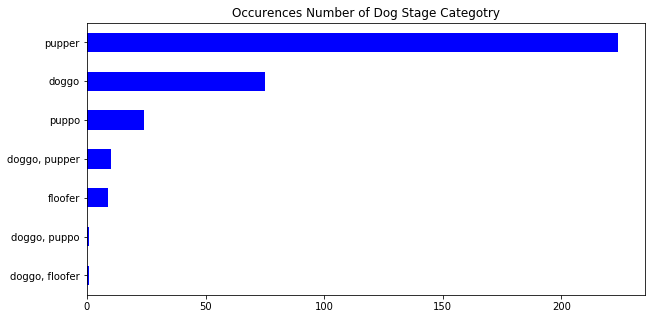

In [425]:
dog_cat_occurences = twitter_archive_master.dogs_stage_category.value_counts()[1:]
dog_cat_occurences.sort_values().plot.barh(title="Occurences Number of Dog Stage Categotry", figsize=(10,5), color='b');

In [395]:
dog_cat_occurences

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dogs_stage_category, dtype: int64

In [396]:
print("The max occurences is for `{}` category and equals {} times.".format(dog_cat_occurences.index[0], 
                                                                                 dog_cat_occurences[0]))
print("The min occurences is for `{} & {}` category and equals {} times.".format(dog_cat_occurences.index[-1],
                                                                                 dog_cat_occurences.index[-2],
                                                                                 dog_cat_occurences[-1]))

The max occurences is for `pupper` category and equals 224 times.
The min occurences is for `doggo, puppo & doggo, floofer` category and equals 1 times.


### Plot the mean & max of Favorite Count for each Dog Stage Category.

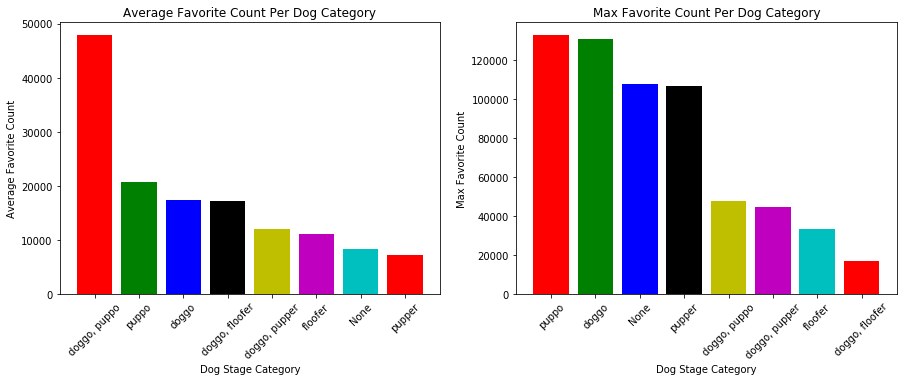

In [412]:
mean_dogcategors_fav_count = twitter_archive_master.groupby('dogs_stage_category').favorite_count.mean()
mean_dogcategors_fav_count = mean_dogcategors_fav_count.sort_values(ascending=False)

locations_1 = np.arange(len(mean_dogcategors_fav_count))
heights_1 = list(mean_dogcategors_fav_count)
labels_1 = mean_dogcategors_fav_count.index




max_dogcategors_fav_count = twitter_archive_master.groupby('dogs_stage_category').favorite_count.max()
max_dogcategors_fav_count = max_dogcategors_fav_count.sort_values(ascending=False)

locations_2 = np.arange(len(max_dogcategors_fav_count))
heights_2 = list(max_dogcategors_fav_count)
labels_2 = max_dogcategors_fav_count.index


f = plt.figure(figsize=(15, 5))

ax1 = f.add_subplot(1, 2, 1)
ax2 = f.add_subplot(1, 2, 2)
ax1.title
ax1.bar(locations_1, heights_1, tick_label=labels_1, color='rgbkymc')
ax1.set_title("Average Favorite Count Per Dog Category")
ax1.set_xlabel("Dog Stage Category")
ax1.set_ylabel("Average Favorite Count")
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

ax2.bar(locations_2, heights_2, tick_label=labels_2, color='rgbkymc');
ax2.set_title("Max Favorite Count Per Dog Category")
ax2.set_xlabel("Dog Stage Category")
ax2.set_ylabel("Max Favorite Count")
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45);

In [413]:
print("The top `Favorite Count` on Average is for {} category and equals {}".format(mean_dogcategors_fav_count.index[0], 
                                                                                        mean_dogcategors_fav_count.values[0]))
print("The top maximum `Favorite Count` is for {} category and equals {}".format(max_dogcategors_fav_count.index[0],
                                                                             max_dogcategors_fav_count.values[0]))

The top `Favorite Count` on Average is for doggo, puppo category and equals 47844.0
The top maximum `Favorite Count` is for puppo category and equals 132810


### Plot the mean & max of Retweet Count for each Dog Stage Category.

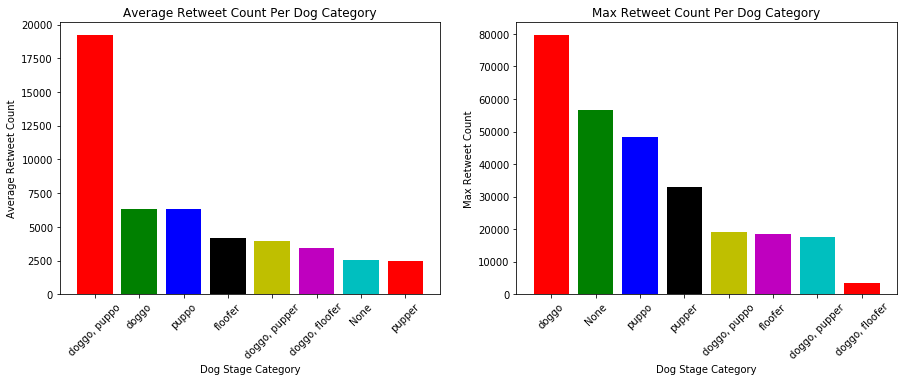

In [414]:
mean_dogcategors_retweet_count = twitter_archive_master.groupby('dogs_stage_category').retweet_count.mean()
mean_dogcategors_retweet_count = mean_dogcategors_retweet_count.sort_values(ascending=False)

locations_1 = np.arange(len(mean_dogcategors_retweet_count))
heights_1 = list(mean_dogcategors_retweet_count)
labels_1 = mean_dogcategors_retweet_count.index




max_dogcategors_retweet_count = twitter_archive_master.groupby('dogs_stage_category').retweet_count.max()
max_dogcategors_retweet_count = max_dogcategors_retweet_count.sort_values(ascending=False)

locations_2 = np.arange(len(max_dogcategors_retweet_count))
heights_2 = list(max_dogcategors_retweet_count)
labels_2 = max_dogcategors_retweet_count.index


f = plt.figure(figsize=(15, 5))

ax1 = f.add_subplot(1, 2, 1)
ax2 = f.add_subplot(1, 2, 2)
ax1.title
ax1.bar(locations_1, heights_1, tick_label=labels_1, color='rgbkymc')
ax1.set_title("Average Retweet Count Per Dog Category")
ax1.set_xlabel("Dog Stage Category")
ax1.set_ylabel("Average Retweet Count")
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

ax2.bar(locations_2, heights_2, tick_label=labels_2, color='rgbkymc');
ax2.set_title("Max Retweet Count Per Dog Category")
ax2.set_xlabel("Dog Stage Category")
ax2.set_ylabel("Max Retweet Count")
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45);

In [415]:
print("The top `Retweet Count` on Average is for {} category and equals {}".format(mean_dogcategors_retweet_count.index[0],
                                                                                       mean_dogcategors_retweet_count.values[0]))
print("The top maximum `Retweet Count` is for {} category and equals {}".format(max_dogcategors_retweet_count.index[0],
                                                                            max_dogcategors_retweet_count.values[0]))




The top `Retweet Count` on Average is for doggo, puppo category and equals 19196.0
The top maximum `Retweet Count` is for doggo category and equals 79515


### Plot the Top 10 Common Breeds

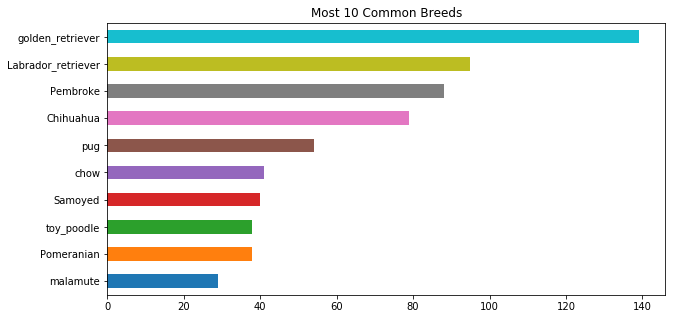

In [442]:
most_10_common_breeds = twitter_archive_master.p1.value_counts()[:10]

most_10_common_breeds.sort_values().plot.barh(title="Most 10 Common Breeds", figsize=(10, 5));

In [443]:
print("The most Common Breed is {}, and it is repeated {} times.".format(most_10_common_breeds.index[0],
                                                                     most_10_common_breeds[0]))

The most Common Breed is golden_retriever, and it is repeated 139 times.


### Plot the Top 10 Beloved Breeds.

In [418]:
twitter_archive_master_dogs_only = twitter_archive_master[twitter_archive_master.p1_dog == True]

most_10_beloved_breeds = twitter_archive_master_dogs_only.groupby('p1').favorite_count.max().sort_values(ascending=False)[:10]

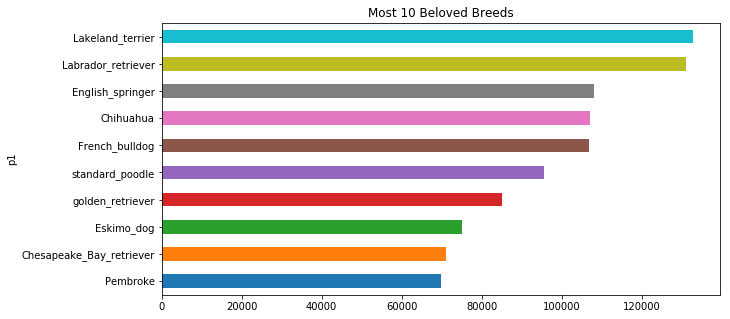

In [419]:
most_10_beloved_breeds.sort_values().plot.barh(title="Most 10 Beloved Breeds", figsize=(10, 5));

In [420]:
print("The most top Beloved Breed is {}, and it is repeated {} times.".format(most_10_beloved_breeds.index[0],
                                                                      most_10_beloved_breeds[0]))

The most top Beloved Breed is Lakeland_terrier, and it is repeated 132810 times.


### Plot the Top 10 Retweeted Breeds.

In [421]:
twitter_archive_master_dogs_only = twitter_archive_master[twitter_archive_master.p1_dog == True]

most_10_retweeted_breeds = twitter_archive_master_dogs_only.groupby('p1').retweet_count.max().sort_values(ascending=False)[:10]

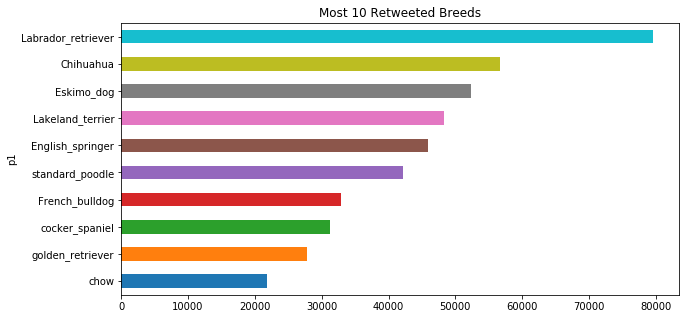

In [422]:
most_10_retweeted_breeds.sort_values().plot.barh(title="Most 10 Retweeted Breeds", figsize=(10, 5));

In [423]:
print("The most top Retweeted Breed is {}, and it is repeated {} times.".format(most_10_retweeted_breeds.index[0],
                                                                        most_10_retweeted_breeds[0]))

The most top Retweeted Breed is Labrador_retriever, and it is repeated 79515 times.
